In [32]:
from IPython import display

import tensorflow as tf
import tensorflow_hub as hub

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

import cv2 as cv2

#keras.summary

mobile_net = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"

inception = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

detector = hub.load(mobile_net).signatures['default']




INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [33]:
img = cv2.imread("faces/man.jpeg")
img2 = cv2.resize(img, (224,224))
mangledImage = np.reshape(img2, [1,224,224,3])

img_tensor = tf.convert_to_tensor(mangledImage, dtype=tf.float32)
result = detector(img_tensor)

In [34]:
result = {key:value.numpy() for key,value in result.items()}



In [44]:
def draw_boxes(result, image):
    w = image.shape[0]
    h = image.shape[1]
    for i in range(2):
        x1,y1,x2,y2 = tuple(result["detection_boxes"][i])
        
        x1 = int(x1*w)
        x2 = int(x2*w)
        
        y1 = int(y1*h)
        y2 = int(y2*h)
        
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 5)
        cv2.putText(image, result["detection_class_entities"][i].decode("ascii"), (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 8)
    imgshow = plt.imshow(image)
    return
    #why is this image black

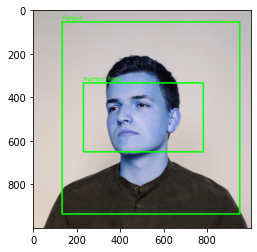

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [40]:
cv2.imshow("Output", np.array(draw_boxes(result, img), dtype = np.uint8))

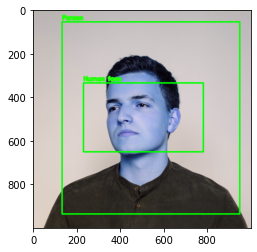

In [45]:
draw_boxes(result, img)
plt.show()